### End 2 End NLP Project
+ Emotion Detection In Text 
+ Text Classifier

In [91]:
# Load EDA Pkgs
import pandas as pd
import numpy as np

In [92]:
# Load Data Viz Pkgs
import seaborn as sns

In [93]:
# Load Text Cleaning Pkgs
import neattext.functions as nfx

In [94]:
# Load ML Pkgs
# Estimators
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# Transformers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [95]:
# Load Dataset
df = pd.read_csv("data/emotion_dataset_2.csv")

In [96]:
df.head()

,Emotion,Text,Unnamed: 2
0,neutral,Why ?,NaN
1,joy,Sage Act upgrade on my to do list for tommorow.,NaN
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,NaN
3,joy,Such an eye ! The true hazel eye-and so brill...,NaN
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,NaN


In [97]:
# Value Counts
df['Emotion'].value_counts()

Emotion
joy         12137
sadness      7804
fear         6486
anger        5376
surprise     4062
neutral      2254
disgust      1922
shame        1217
guilt        1049
guit            1
Name: count, dtype: int64

<Axes: xlabel='Emotion', ylabel='count'>

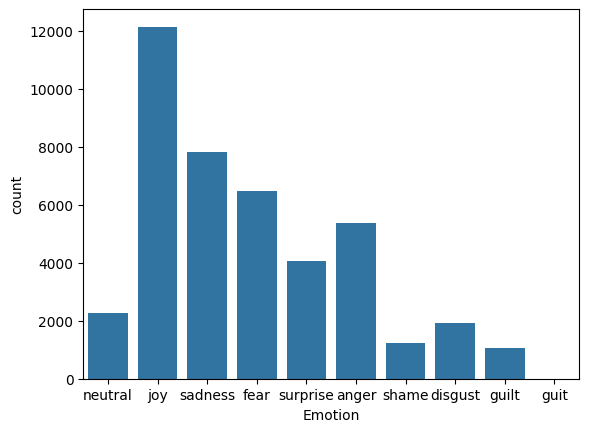

In [98]:
# Plot
sns.countplot(x='Emotion',data=df)

In [99]:
# Data Cleaning
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [100]:
# User handles
df['Clean_Text'] = df['Text'].apply(nfx.remove_userhandles)

In [101]:
# Stopwords
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_stopwords)

In [102]:
df

,Emotion,Text,Unnamed: 2,Clean_Text
0,neutral,Why ?,NaN,?
1,joy,Sage Act upgrade on my to do list for tommorow.,NaN,Sage Act upgrade list tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,NaN,WAY HOMEGIRL BABY FUNERAL!!! MAN HATE FUNERALS...
3,joy,Such an eye ! The true hazel eye-and so brill...,NaN,eye ! true hazel eye-and brilliant ! Regular f...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,NaN,ugh babe.. hugggzzz u .! babe naamazed nga ako...
...,...,...,...,...
42303,shame,Two years back someone invited me to be the tu...,NaN,years invited tutor grand-daughter. grand-daug...
42304,shame,I had taken the responsibility to do something...,NaN,taken responsibility prepared it. failed timid...
42305,fear,I was at home and I heard a loud sound of spit...,NaN,home heard loud sound spitting outside door. t...
42306,guilt,I did not do the homework that the teacher had...,NaN,homework teacher asked do. scolded immediately.


In [103]:
# Features & Labels
Xfeatures = df['Clean_Text']
ylabels = df['Emotion']

In [104]:
#  Split Data
x_train,x_test,y_train,y_test = train_test_split(Xfeatures,ylabels,test_size=0.3,random_state=42)

In [105]:
# Build Pipeline
from sklearn.pipeline import Pipeline

In [106]:
# LogisticRegression Pipeline
pipe_lr = Pipeline(steps=[('cv',CountVectorizer()),('lr',LogisticRegression())])

In [107]:
# Train and Fit Data
pipe_lr.fit(x_train,y_train)

C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [108]:
pipe_lr

Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [109]:
# Check Accuracy
pipe_lr.score(x_test,y_test)

0.6399590325376192

In [115]:
# Make A Prediction
ex1 = "i was in a surprise as one of my friend give me a cake and gift for my birthday "

In [116]:
pipe_lr.predict([ex1])

array(['surprise'], dtype=object)

In [112]:
# Prediction Prob
pipe_lr.predict_proba([ex1])

array([[1.60965598e-03, 1.02732400e-02, 2.20411057e-02, 2.59494033e-04,
        1.00936593e-14, 8.62998071e-01, 5.73118868e-05, 4.03284683e-02,
        1.26367622e-04, 6.23062857e-02]])

In [113]:
# To Know the classes
pipe_lr.classes_

array(['anger', 'disgust', 'fear', 'guilt', 'guit', 'joy', 'neutral',
       'sadness', 'shame', 'surprise'], dtype=object)

In [114]:
# Save Model & Pipeline
import joblib
pipeline_file = open("emotion_classifier_pipe_lr.pkl","wb")
joblib.dump(pipe_lr,pipeline_file)
pipeline_file.close()